In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python", "scikit-image", "scikit-learn",]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from tensorflow import keras

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python
Installing: scikit-image
Installing: scikit-learn


## Загрузка данных CIFAR-10  
x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


# Задание 1 Old school image classifier



In [ ]:
import cv2

In [ ]:
len(x_train)

50000

In [ ]:
img = cv2.cvtColor(x_train[0], cv2.COLOR_RGB2GRAY)

winSize = (32,32)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (16,16)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradients = True
 
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,
  cellSize,nbins,derivAperture,
  winSigma,histogramNormType,L2HysThreshold,
  gammaCorrection,nlevels, signedGradients)

descriptor = hog.compute(img)

x_train_hog = []
for img in x_train:
  x_train_hog.append(hog.compute(img).ravel())

x_test_hog = []
for img in x_test:
  x_test_hog.append(hog.compute(img).ravel())


In [ ]:
from sklearn.svm import SVC

In [ ]:
clf_svm = SVC(gamma='auto', class_weight='balanced')
clf_svm.fit(x_train_hog, y_train.ravel())

SVC(class_weight='balanced', gamma='auto')

In [ ]:
y_pred_test = clf_svm.predict(x_test_hog)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test.ravel(), y_pred_test)

0.4329

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train_hog, y_train.ravel())

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_test_knn = neigh.predict(x_test_hog)

In [ ]:
accuracy_score(y_test.ravel(), y_pred_test_knn)

0.4394

# Задание 2 NN image classifier



In [ ]:
train_labels_one_hot = keras.utils.to_categorical(y_train)
test_labels_one_hot = keras.utils.to_categorical(y_test)

In [ ]:
test_labels_one_hot[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(81,)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(np.array(x_train_hog), train_labels_one_hot, batch_size=256, epochs=50, verbose=1,
                   validation_data=(np.array(x_test_hog), test_labels_one_hot))


Epoch 1/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1923 - accuracy: 0.5821 - val_loss: 1.3825 - val_accuracy: 0.5186
Epoch 2/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1773 - accuracy: 0.5891 - val_loss: 1.3937 - val_accuracy: 0.5160
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1635 - accuracy: 0.5945 - val_loss: 1.4907 - val_accuracy: 0.4809
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1525 - accuracy: 0.5970 - val_loss: 1.4360 - val_accuracy: 0.4954
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1340 - accuracy: 0.6028 - val_loss: 1.3382 - val_accuracy: 0.5351
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1253 - accuracy: 0.6060 - val_loss: 1.3423 - val_accuracy: 0.5363
Epoch 7/50
196/196 [==============================] - 4s 19ms/step - loss: 1.1090 - accuracy: 0.6097 - val_loss: 1.3553 - val_accuracy: 0.5338

In [ ]:
[test_loss, test_acc] = model.evaluate(np.array(x_test_hog), test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 1.8736 - accuracy: 0.5025
Evaluation result on Test Data : Loss = 1.8736499547958374, accuracy = 0.5024999976158142


Text(0.5, 1.0, 'Accuracy Curves')

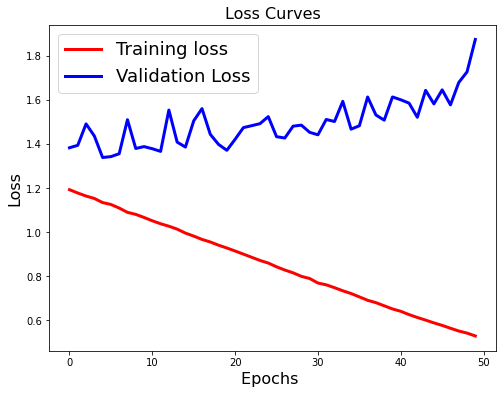

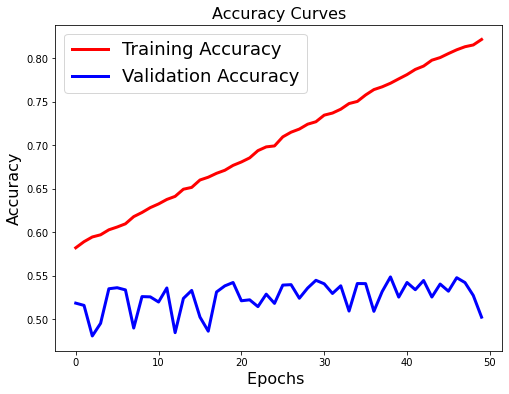

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
x_train_pix = []
for img in x_train:
  x_train_pix.append(img.ravel())

x_test_pix = []
for img in x_test:
  x_test_pix.append(img.ravel())

In [ ]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(512, activation='relu', input_shape=(len(x_train_pix[0]),)))
model2.add(keras.layers.Dense(512, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(np.array(x_train_pix), train_labels_one_hot, batch_size=256, epochs=50, verbose=1,
                   validation_data=(np.array(x_test_pix), test_labels_one_hot))

Epoch 1/50
196/196 [==============================] - 16s 75ms/step - loss: 155.0566 - accuracy: 0.1074 - val_loss: 10.7129 - val_accuracy: 0.1020
Epoch 2/50
196/196 [==============================] - 15s 74ms/step - loss: 4.3759 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 3/50
196/196 [==============================] - 14s 71ms/step - loss: 3.2550 - accuracy: 0.0979 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 4/50
196/196 [==============================] - 14s 72ms/step - loss: 2.6048 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 5/50
196/196 [==============================] - 14s 71ms/step - loss: 2.7922 - accuracy: 0.0974 - val_loss: 2.3024 - val_accuracy: 0.1002
Epoch 6/50
196/196 [==============================] - 15s 78ms/step - loss: 2.3647 - accuracy: 0.0999 - val_loss: 2.3021 - val_accuracy: 0.1003
Epoch 7/50
196/196 [==============================] - 14s 70ms/step - loss: 2.4151 - accuracy: 0.0980 - val_loss: 2.3022 - val_accura

In [ ]:
[test_loss, test_acc] = model2.evaluate(np.array(x_test_pix), test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 2.3021 - accuracy: 0.1002
Evaluation result on Test Data : Loss = 2.3021469116210938, accuracy = 0.10019999742507935


Text(0.5, 1.0, 'Accuracy Curves')

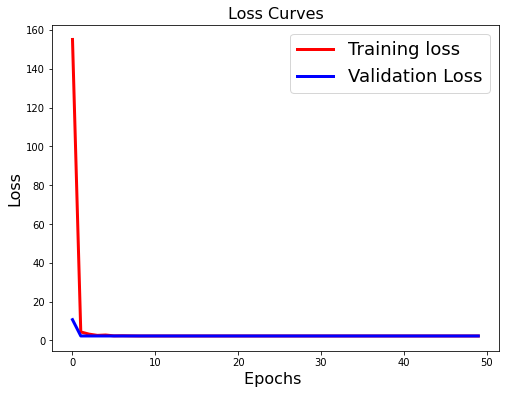

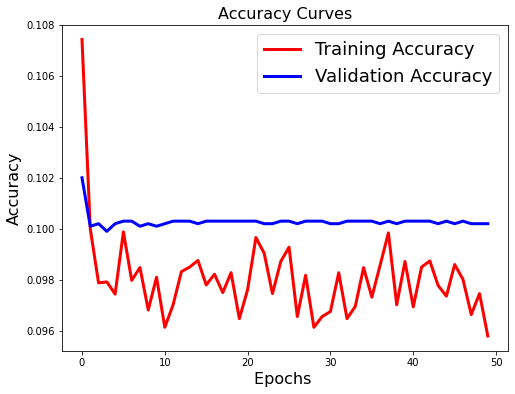

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)